Import all the needed library

In [1]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2

from PIL import Image
import scipy.misc

Using TensorFlow backend.


In [53]:
folders = listdir("../")
folders

['NormalFPKM.txt',
 '.ipynb_checkpoints',
 'scr',
 'CancerCounts.txt',
 'CancerFPKM_UQ.txt',
 'NormalFPKM_UQ.txt',
 'CancerFPKM.txt',
 'NormalCounts.txt']

In [2]:
cancer_filename = "../CancerFPKM.txt"
normal_filename = "../NormalFPKM.txt"

In [3]:
cancer_data = pd.read_table(cancer_filename, header=None)
cancer_data_t = cancer_data.T
cancer_data_tmp = cancer_data_t
cancer_data_tmp.columns = cancer_data_tmp.iloc[0]
cData = cancer_data_tmp.drop(0)
cData.shape

(1034, 60483)

In [4]:
normal_data = pd.read_table(normal_filename, header=None)
normal_data_t = normal_data.T
normal_data_tmp = normal_data_t
normal_data_tmp.columns = normal_data_tmp.iloc[0]
nData = normal_data_tmp.drop(0)
nData.shape

(730, 60483)

In [198]:
nData.columns

Index(['ENSG00000271876.1', 'ENSG00000063515.2', 'ENSGR0000234958.4',
       'ENSG00000201567.1', 'ENSG00000234601.1', 'ENSG00000229745.1',
       'ENSG00000278842.1', 'ENSG00000203950.6', 'ENSG00000185522.7',
       'ENSG00000148730.6',
       ...
       'ENSG00000231955.1', 'ENSG00000204186.6', 'ENSG00000252118.1',
       'ENSG00000273210.1', 'ENSG00000212171.1', 'ENSG00000219257.2',
       'ENSG00000197471.10', 'ENSG00000233383.1', 'ENSG00000125975.12',
       'ENSG00000236538.1'],
      dtype='object', name=0, length=60483)

In [49]:
#re.split("\.",cData.columns.values[1])[0]
#r = re.compile("ENSG00000271876")
#len(list(filter(r.match, cData.columns.values)))

1

In [9]:
#df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3'],'C': ['C0', 'C1', 'C2', 'C3'],'D': ['D0', 'D1', 'D2', 'D3']}, index=[0, 1, 2, 3])

In [199]:
#df1

In [11]:
#df2 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'C': ['C0', 'C1', 'C2', 'C3'],'B': ['B0', 'B1', 'B2', 'B3'],'D': ['D0', 'D1', 'D2', 'D3']}, index=[4, 5, 6, 7])

In [200]:
#df2

In [ ]:
#pd.concat([df1, df2], axis=0, join='outer', join_axes=None, ignore_index=False,
#          keys=None, levels=None, names=None, verify_integrity=False,
#          copy=True)

In [201]:
allData = pd.concat([cData, nData], axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

In [202]:
#d = np.array(allData.values, dtype='float')
dat = allData.values
dat = dat.astype('float32')
dat[np.isnan(dat)] = 0
#dat = np.c_[ dat, np.zeros(shape=(dat.shape[0], 17))]
dat.shape

Y_cancer = np.ones(1034)
Y_normal = np.zeros(730)

dat_Y = np.append(Y_cancer, Y_normal)

---

In [ ]:
b = [0.0] * 12
for i in range(3104):
    tmp = cData.iloc[i].tolist()
    tmp = np.array(tmp + b)
    tmp = tmp + 1
    #tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)
    name = "../cancer_image/c"+("%04d" % (i,)) +".jpg"
    scipy.misc.imsave(name, img)
    
a = cData.iloc[0].tolist()

In [ ]:
b = [0.0] * 12
c = np.array(a + b)
c = c + 1
img = np.log10(c)
#img = c
plt.hist(img)
plt.show()
img = img.reshape(250, 242)

In [ ]:
type(img)

In [ ]:
plt.imshow(img)
#plt.colorbar()
plt.show()


scipy.misc.imsave('outfile.jpg', img)

In [ ]:
"c"+("%04d" % (1,)) +".jpg"

Change data to 250*242=60500

In [ ]:
b = [0.0] * 12

for i in range(324):
    tmp = None
    tmp = nData.iloc[i].tolist()
    # print(tmp)
    tmp = np.array(tmp + b)
    tmp = tmp + 1
    tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)
    name = "../normal_image/n"+("%04d" % (i,)) +".jpg"
    scipy.misc.imsave(name, img)

In [ ]:
def img_gen(input_d):
    b = [0.0] * 12
    tmp = np.array(input_d + b)
    tmp = tmp + 1
    tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)

## To show Nathan

In [ ]:
b = [0.0] * 12
import csv
for i in range(10):
    tmp = cData.iloc[i].tolist()
    tmp = np.array(tmp + b).reshape(250, 242)
    fname = "../scr/Cancer/c"+("%04d" % (i,)) + ".csv"
    np.savetxt(fname, tmp, delimiter=',')
    
    tmp_2d = tmp.reshape(250, 242)
    name = "../scr/Cancer/c"+("%04d" % (i,)) +"_original.jpg"
    scipy.misc.imsave(name, img)
    
    tmp = tmp + 1
    tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)
    name = "../scr/Cancer/c"+("%04d" % (i,)) +"_log.jpg"
    scipy.misc.imsave(name, img)

In [ ]:
for i in range(10):
    tmp = nData.iloc[i].tolist()
    tmp = np.array(tmp + b).reshape(250, 242)
    fname = "../scr/Normal/n"+("%04d" % (i,)) + ".csv"
    np.savetxt(fname, tmp, delimiter=',')
    
    tmp_2d = tmp.reshape(250, 242)
    name = "../scr/Normal/n"+("%04d" % (i,)) +"_original.jpg"
    scipy.misc.imsave(name, img)
    
    tmp = tmp + 1
    tmp = np.log10(tmp)
    tmp_2d = tmp.reshape(250, 242)
    name = "../scr/Normal/n"+("%04d" % (i,)) +"_log.jpg"
    scipy.misc.imsave(name, img)

In [ ]:
tmp1 = nData.iloc[1].tolist()
tmp1 = np.array(tmp1 + b)
print(tmp1.tolist())

In [ ]:
tmp2 = nData.iloc[2].tolist()
tmp2 = np.array(tmp2 + b)
print(tmp2.tolist())

# May 3
Nathan suggests: 
1. Solve for a PCA basis and project on to that.
2. Project onto a random basis (instead of PCA make each entry in the projection matrix an independent sample from a unit Gaussian).
3. Start with 1) or 2) and then optimize the projection for the task (but you will have to be careful here that you don't overfit since you will have so many free parameters).  Heavy regularization might be necessary.

In [203]:
dat.shape

(1764, 60483)

# Data partitian

In [204]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dat, dat_Y, test_size=0.2, random_state=123, stratify=dat_Y)

In [205]:
x_train_mean = x_train.mean(axis=0) # to take the mean of each col

In [207]:
X_nor = x_train - x_train_mean

In [208]:
X_nor

array([[-0.02, -0.01,  0.  , ...,  0.11, -0.01,  0.03],
       [ 0.1 , -0.02,  0.  , ..., -0.04, -0.01, -0.  ],
       [-0.02, -0.02,  0.  , ..., -0.04, -0.01, -0.  ],
       ..., 
       [-0.02, -0.02,  0.  , ..., -0.04, -0.01, -0.  ],
       [-0.02, -0.02,  0.  , ..., -0.04, -0.01, -0.  ],
       [-0.02, -0.02,  0.  , ...,  0.02, -0.01, -0.  ]], dtype=float32)

In [210]:
x_train[0,:] - x_train_mean

array([-0.02, -0.01,  0.  , ...,  0.11, -0.01,  0.03], dtype=float32)

In [211]:
results = np.linalg.svd(X_nor)

In [225]:
np.savetxt("../svd_nxn.txt", results[0], delimiter=',')

In [213]:
results[1].shape

(1411,)

In [224]:
np.savetxt("../svd_nx1.txt", results[1], delimiter=',')

In [ ]:
np.savetxt("../svd_pxp.txt", results[2], delimiter=',')

In [221]:
!pwd

/home/bill/notebooks/DL/scr


# SVM

In [59]:
from sklearn import svm

In [63]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
result1 = clf.predict(x_test)

In [67]:
result1

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [69]:
clf2 = svm.SVC(decision_function_shape='ovo')

In [70]:
clf2.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
result2 = clf2.predict(x_test)

In [72]:
result2

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [94]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [97]:
class_names = ["Normal", "Cancer"]

In [91]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0 146]
 [  0 207]]
Normalized confusion matrix
[[ 0.  1.]
 [ 0.  1.]]


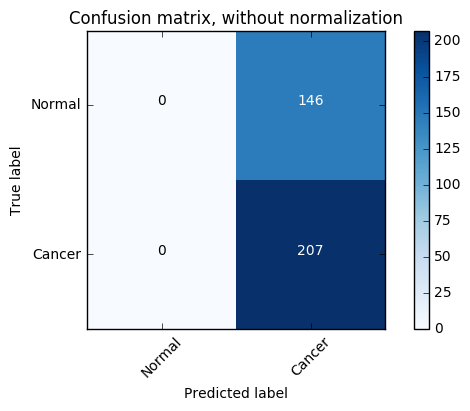

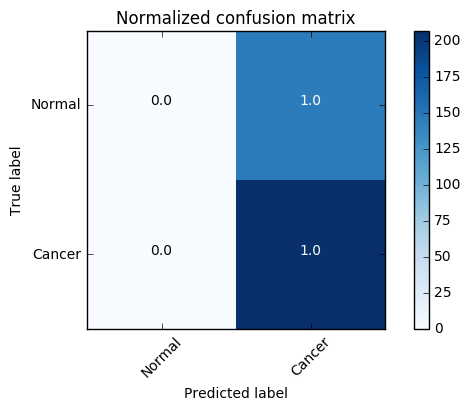

In [99]:
cnf_matrix = confusion_matrix(y_test, result1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

accuracy_score(y_test, result2)
precision, recall, threshold = precision_recall_curve(y_test, result2)

In [135]:
np.mean(y_test)

0.58640226628895187

In [134]:
threshold

array([ 1.])

In [132]:
precision

array([ 0.59,  1.  ])

In [133]:
recall

array([ 1.,  0.])

# Audoendoder

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

In [140]:
from keras import regularizers
from keras import optimizers

# this is our input placeholder
input_img = Input(shape=(60483,))
# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
#encoded = Dense(50, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = Dense(25, activation='relu')(input_img)
#encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(50, activation='relu')(encoded)
#decoded = Dense(100, activation='sigmoid')(encoded)
decoded = Dense(60483, activation='sigmoid')(encoded)

sgd = optimizers.SGD(lr = 0.04, momentum = 0.9)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [142]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

Find which one is nan

In [144]:
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1411 samples, validate on 353 samples
Epoch 1/1000
1411/1411 [==============================] - 1s - loss: -82.4004 - acc: 0.4539 - val_loss: -82.2769 - val_acc: 0.4471
Epoch 2/1000
1411/1411 [==============================] - 1s - loss: -82.3921 - acc: 0.4538 - val_loss: -82.3068 - val_acc: 0.4476

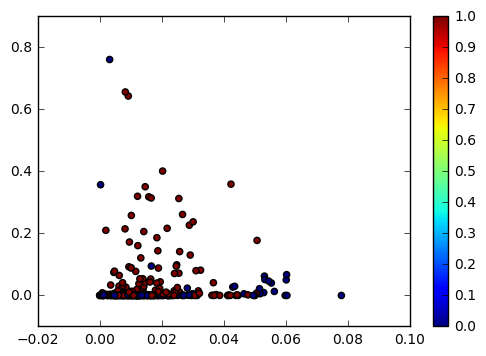

In [145]:
x_test_encoded = autoencoder.predict(x_test, batch_size=256)
plt.figure()#figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [146]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 60483)             0         
_________________________________________________________________
dense_65 (Dense)             (None, 25)                1512100   
_________________________________________________________________
dense_66 (Dense)             (None, 60483)             1572558   
Total params: 3,084,658
Trainable params: 3,084,658
Non-trainable params: 0
_________________________________________________________________


Extract the third hidden layer and then feed them to a fully connected neural network with logistic units to do a prediction.

In [164]:
third = autoencoder.get_layer("dense_65")
#third_Layer = third(x_train)

In [192]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer("dense_65").output)

def ae(x):
    return(model.predict(x))


In [194]:
from sklearn import linear_model
from sklearn.svm import SVC

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(ae(x_train), y_train)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [196]:
result_logreg = logreg.predict(ae(x_test))

Confusion matrix, without normalization
[[143   3]
 [  2 205]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.01  0.99]]


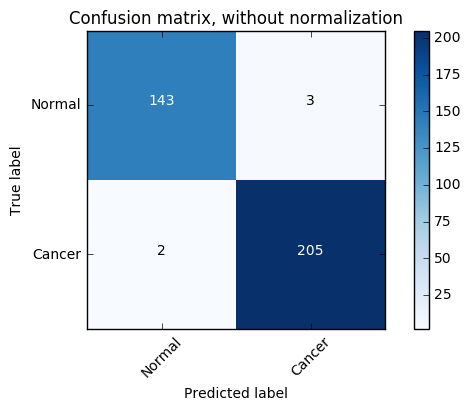

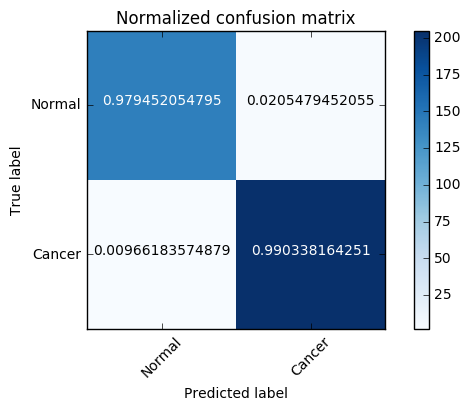

In [197]:
cnf_matrix = confusion_matrix(y_test, result_logreg)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.11. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

# May 8

## Adding a sparsity constraint on the encoded representations

In the previous example, the representations were only constrained by the size of the hidden layer (32). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA (principal component analysis). But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer:

In [89]:
from keras import regularizers
from keras import optimizers

encoding_dim = 100 # 32 floats -> compression of factor 250, assuming the input is 60500 floats

# this is our input placeholder
input_img = Input(shape=(60483,))
# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = Dense(50, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = Dense(20, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
#encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(50, activation='relu')(encoded)
#decoded = Dense(100, activation='sigmoid')(encoded)
decoded = Dense(60483, activation='sigmoid')(encoded)

sgd = optimizers.SGD(lr = 0.04, momentum = 0.9)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [90]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
results2 = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1411 samples, validate on 353 samples
Epoch 1/50
1411/1411 [==============================] - 1s - loss: 1.3323 - acc: 0.3259 - val_loss: -21.4261 - val_acc: 0.3675

### Adding more layers -- Deep autoencoder

In [79]:
input_img = Input(shape=(60483,))
encoded = Dense(50, activation='relu')(input_img)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(60483, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

result3 = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1411 samples, validate on 353 samples
Epoch 1/50


ResourceExhaustedError: OOM when allocating tensor with shape[60483,1000]
	 [[Node: dense_1295/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=7968276, _device="/job:localhost/replica:0/task:0/gpu:0"](dense_1295/random_uniform/shape)]]

Caused by op 'dense_1295/random_uniform/RandomUniform', defined at:
  File "/anaconda/envs/py35/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/envs/py35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-78-8b2dbd469877>", line 10, in <module>
    activity_regularizer=regularizers.l1(10e-5))(input_img)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/topology.py", line 551, in __call__
    self.build(input_shapes[0])
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py", line 827, in build
    constraint=self.kernel_constraint)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/topology.py", line 384, in add_weight
    weight = K.variable(initializer(shape), dtype=K.floatx(), name=name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/initializers.py", line 208, in __call__
    dtype=dtype, seed=self.seed)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 3177, in random_uniform
    dtype=dtype, seed=seed)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/random_ops.py", line 244, in random_uniform
    seed2=seed2)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gen_random_ops.py", line 220, in _random_uniform
    seed=seed, seed2=seed2, name=name)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[60483,1000]
	 [[Node: dense_1295/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=7968276, _device="/job:localhost/replica:0/task:0/gpu:0"](dense_1295/random_uniform/shape)]]


In [63]:
result3.history['acc'][-1]

0.45436201737249765

# May 14
Seperate p in to several partician

In [53]:
x_test.shape

(353, 60500)

In [48]:
def factors(n):    
    result = set()
    for i in range(1, int(n ** 0.5) + 1):
        div, mod = divmod(n, i)
        if mod == 0:
            result |= {i, div}
    return result

In [67]:
def autoEncoder(X, Y):
    input_img = Input(shape=(605,))
    encoded = Dense(600, activation='relu')(input_img)
    encoded = Dense(500, activation='relu')(encoded)
    encoded = Dense(400, activation='relu')(encoded)
    encoded = Dense(300, activation='relu')(encoded)
    encoded = Dense(200, activation='relu')(encoded)

    decoded = Dense(200, activation='relu')(encoded)
    decoded = Dense(300, activation='relu')(encoded)
    decoded = Dense(400, activation='relu')(encoded)
    decoded = Dense(500, activation='relu')(encoded)
    decoded = Dense(600, activation='relu')(decoded)
    decoded = Dense(605, activation='sigmoid')(decoded)
    
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
    
    result = autoencoder.fit(X, X,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(Y, Y))
    print(result.history['acc'][-1])
    return(result.history['acc'][-1])

In [54]:
r = []
for i in range(100):
    start = i*605
    end = (i+1)*605
    X = x_train[:,start:end]
    Y = x_test[:,start:end]
    
    r.append(autoEncoder(X, Y))
    

NameError: name 'autoEncoder' is not defined

In [69]:
r

[0.429155780735124,
 0.44679053213307401,
 0.470150106558134,
 0.43261973265212617,
 0.47346173172973727,
 0.48692385682309458,
 0.45046299172157434,
 0.46601845648253243,
 0.46537767848083095,
 0.45142357130577848,
 0.47917715397225807,
 0.43356388809408897,
 0.48065784850245585,
 0.44503224212847897,
 0.45088704056050405,
 0.49765066837352018,
 0.44857228558423418,
 0.46514456792557013,
 0.46121322466581954,
 0.46981155264048102,
 0.47119033695703527,
 0.4440447024467733,
 0.46800169156511823,
 0.45082144309323702,
 0.47311500118270483,
 0.43962372587049875,
 0.45938110064311199,
 0.47728762936710384,
 0.45060122236979083,
 0.44984095684608444,
 0.49361742191243729,
 0.44338753711746398,
 0.4659223901642543,
 0.48929130509337326,
 0.42619674018644255,
 0.46233899195425737,
 0.44903970901041823,
 0.44342032410758847,
 0.47037501019590039,
 0.46550067000402617,
 0.43764985011115637,
 0.48274533312258189,
 0.4495890835850565,
 0.46660182479845558,
 0.48517139328869413,
 0.47238049946044

# Note:

## LSTM autoencoder on sequences of text (titles of web articles)

In [ ]:
input_sentence = Input(shape=(max_title_length, number_of_chars), dtype='int32')
tofloat = Lambda(function=lambda x: tf.to_float(x))(input_sentence)
encoder = LSTM(latent_dim, activation='tanh')(tofloat)

decoder = RepeatVector(max_title_len)(encoder)
decoder = LSTM(number_of_chars, return_sequences=True, activation='tanh')(decoder)
autoencoder = Model(input=input_sentence, output=decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Deep autoencoder

We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

## Convolutional autoencoder

Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.


In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

To train it, we will use the original MNIST digits with shape (samples, 3, 28, 28), and we will just normalize pixel values between 0 and 1.

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

Let's train this model for 50 epochs. For the sake of demonstrating how to visualize the results of a model during training, we will be using the TensorFlow backend and the TensorBoard callback.

First, let's open up a terminal and start a TensorBoard server that will read logs stored at /tmp/autoencoder.

In [ ]:
tensorboard --logdir=/tmp/autoencoder

Then let's train our model. In the callbacks list we pass an instance of the TensorBoard callback. After every epoch, this callback will write logs to /tmp/autoencoder, which can be read by our TensorBoard server.

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

This allows us to monitor training in the TensorBoard web interface (by navighating to http://0.0.0.0:6006):

The model converges to a loss of 0.094, significantly better than our previous models (this is in large part due to the higher entropic capacity of the encoded representation, 128 dimensions vs. 32 previously). Let's take a look at the reconstructed digits:



In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train model with Y

In [ ]:
x = Input(shape=(input_dim,))
encoder = Dense(output_dim)(x)
decoder = Dense(input_dim)(encoder)
 
autoencoder = Model(input=x, output=decoder)
supervised = Model(input=x, output=encoder)
 
autoencoder.compile(...)
supervised.compile(...)


## MINST Data

In [ ]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)